# Programming Assignment -1

#### Biuld a CNN model to classify the MNIST handwritten digits dataset.
- Try to get an accuracy over 98.2%
- Use different loss function (Adam, SGD, RMSProp)
- Analyze the affect of using and not using data normalization.

### Load necessary packages

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist 

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 1


### Load mnist Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


### Display Images

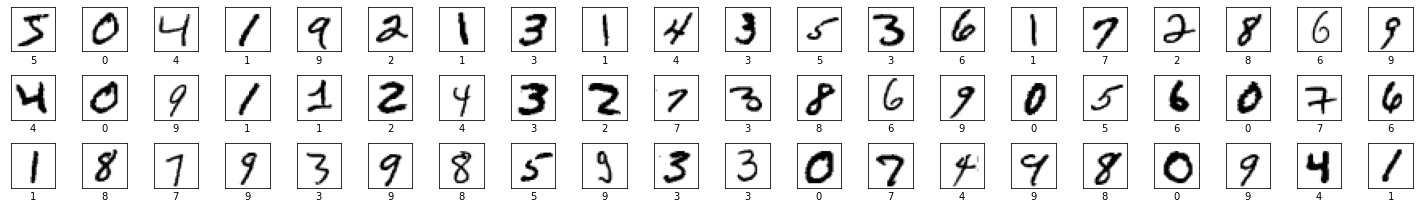

In [4]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 


### Normalise Data

In [5]:
x_train = x_train.reshape(-1, 28,28,1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28,28,1).astype("float32") / 255.0

###### Analyze the affect of using and not using data normalization.

Without normalization the data will be in 1 dimention. So, the model will show error and not show output without data normalization. With float and divition with 255 the value will be in between 0 to 1. Thats why the outputs are in float and points.

### Build the model

In [6]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

### Compile Step: Use any One

In [7]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [8]:
# model.compile(
#     optimizer='sgd', 
#     loss='sparse_categorical_crossentropy', 
#     metrics=['accuracy']
# )

In [9]:
# model.compile(
#     optimizer='rmsprop', 
#     loss='sparse_categorical_crossentropy', 
#     metrics=['accuracy']
# )

### Train The Model

In [10]:
h = model.fit(x=x_train, y=y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 13s 5ms/step - loss: 0.3691 - accuracy: 0.8808 - val_loss: 0.0553 - val_accuracy: 0.9834
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0523 - accuracy: 0.9839 - val_loss: 0.0459 - val_accuracy: 0.9858
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 0.0366 - val_accuracy: 0.9899
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0230 - accuracy: 0.9928 - val_loss: 0.0428 - val_accuracy: 0.9878
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0176 - accuracy: 0.9949 - val_loss: 0.0380 - val_accuracy: 0.9889


### Ploting The training results

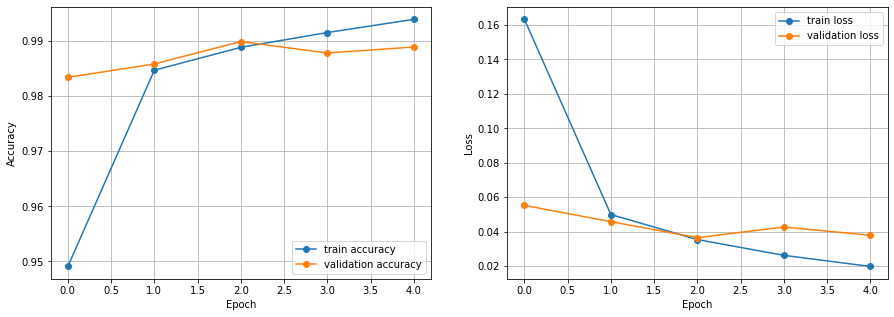

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

### Evaluate the model on the test dataset

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0308 - accuracy: 0.9908

Test Accuracy: 0.9908000230789185

Test Loss: 0.03078451007604599


### Make predictions on the entire test images

In [13]:
predictions = model.predict(x_test)

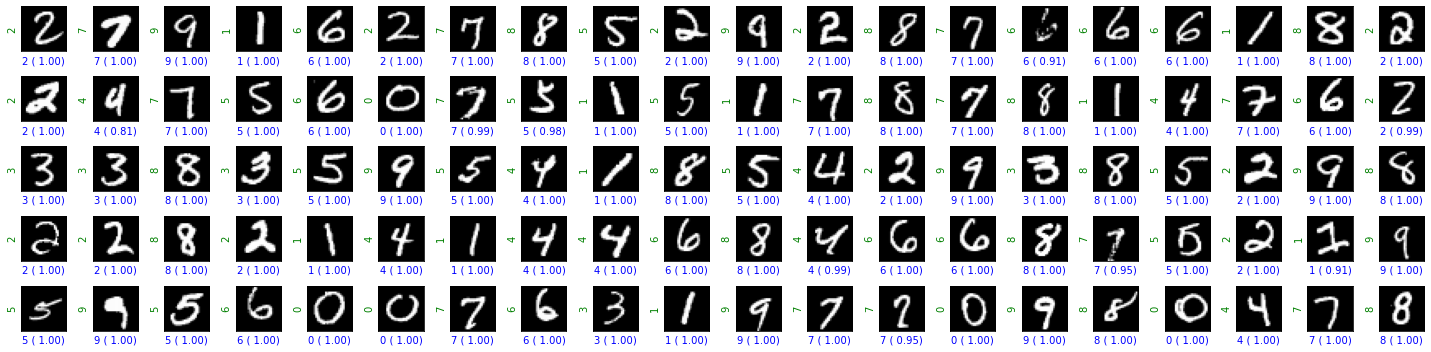

In [14]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()